<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [48]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [49]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [50]:
# Identify missing values in critical columns
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values in critical columns:\n", missing_values)


Missing values in critical columns:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [51]:
# Impute missing values in 'Employment' and 'RemoteWork' with the mode
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

# Verify missing values have been imputed
missing_values_after_imputation = df[['Employment', 'RemoteWork']].isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 Employment    0
RemoteWork    0
dtype: int64


/tmp/ipykernel_1286/961445304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
/tmp/ipykernel_1286/961445304.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [52]:
# Convert 'YearsCodePro' to numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
experience_bins = [0, 5, 10, 20, np.inf]
experience_labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=experience_bins, labels=experience_labels)

# Define a function to fill missing 'JobSat' values with the mode of each group
def fill_jobsat_mode(group):
    mode_value = group['JobSat'].mode()[0]
    group['JobSat'].fillna(mode_value, inplace=True)
    return group

# Group by 'ExperienceRange' and apply the function
df = df.groupby('ExperienceRange').apply(fill_jobsat_mode)

# Verify missing values in 'JobSat' have been imputed
missing_values_after_imputation_jobsat = df['JobSat'].isnull().sum()
print("Missing values in 'JobSat' after imputation:\n", missing_values_after_imputation_jobsat)


/tmp/ipykernel_1286/1548549488.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('ExperienceRange').apply(fill_jobsat_mode)
/tmp/ipykernel_1286/1548549488.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  group['JobSat'].fillna(mode_value, inplace=True)


Missing values in 'JobSat' after imputation:
 0


/tmp/ipykernel_1286/1548549488.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('ExperienceRange').apply(fill_jobsat_mode)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [53]:
# Convert 'YearsCodePro' to numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
experience_bins = [0, 5, 10, 20, np.inf]
experience_labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=experience_bins, labels=experience_labels)


In [54]:
# Reset index to avoid ambiguity
df = df.reset_index(drop=True)

# Calculate median JobSat for each experience range
median_jobsat = df.groupby('ExperienceRange')['JobSat'].median()
print("Median JobSat for each experience range:\n", median_jobsat)


Median JobSat for each experience range:
 ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_1286/2078603155.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df.groupby('ExperienceRange')['JobSat'].median()


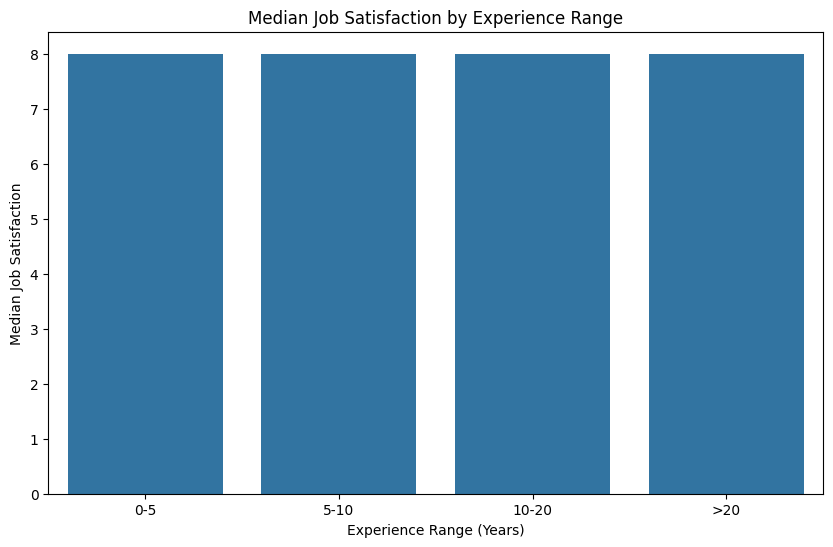

In [55]:

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=median_jobsat.index, y=median_jobsat.values)
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


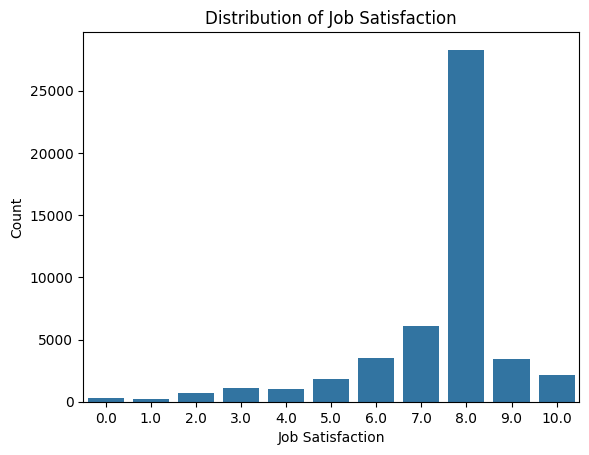

In [56]:
sns.countplot(x='JobSat', data=df)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


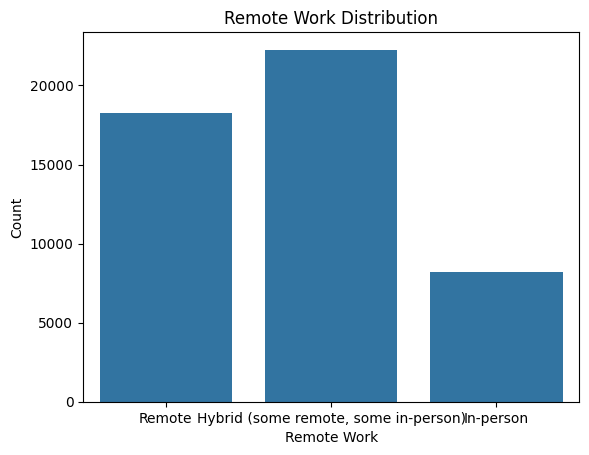

Remote work preferences by employment type:
 RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                15178   
Employed, full-time;Employed, part-time                                               72   
Employed, full-time;Independent contractor, fre...                                  1175   
Employed, full-time;Independent contractor, fre...                                    67   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     2   
Student, full-time;Student, part-time;Retired                                          1   
Student, part-time                 

In [57]:
# Count plot for remote work distribution
sns.countplot(x='RemoteWork', data=df)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

# Cross-tabulate remote work preferences by employment type and job roles
remote_work_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])
print("Remote work preferences by employment type:\n", remote_work_crosstab)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Top programming languages by region:
 Country
Afghanistan                             JavaScript
Albania                                        SQL
Algeria                                 JavaScript
Andorra                                        SQL
Angola                                  JavaScript
                                           ...    
Venezuela, Bolivarian Republic of...    JavaScript
Viet Nam                                JavaScript
Yemen                                     HTML/CSS
Zambia                                    HTML/CSS
Zimbabwe                                JavaScript
Length: 175, dtype: object


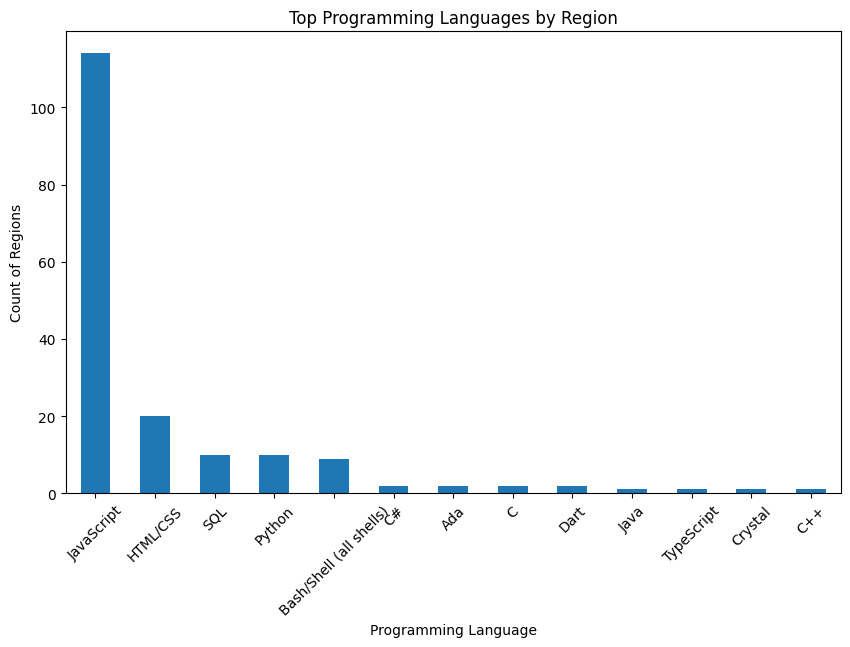

In [58]:

# Explode the 'LanguageHaveWorkedWith' column
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageHaveWorkedWith')

# Count the occurrences of each language by region
language_by_region = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().unstack().fillna(0)

# Identify the most popular language in each region
top_languages_by_region = language_by_region.idxmax(axis=1)
print("Top programming languages by region:\n", top_languages_by_region)

# Visualize with a bar plot
top_languages_by_region.value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Top Programming Languages by Region')
plt.xlabel('Programming Language')
plt.ylabel('Count of Regions')
plt.xticks(rotation=45)
plt.show()



#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


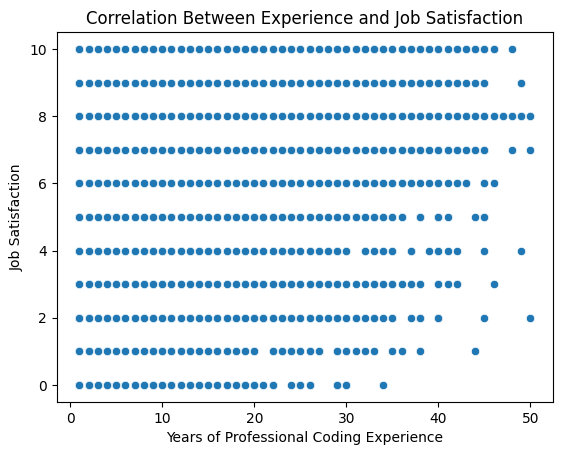

In [59]:
sns.scatterplot(x='YearsCodePro', y='JobSat', data=df)
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [61]:
# Check the unique values in the 'Employment' column
unique_employment_types = df['Employment'].unique()
print("Unique Employment Types:\n", unique_employment_types)


Unique Employment Types:
 ['Independent contractor, freelancer, or self-employed'
 'Student, full-time' 'Employed, full-time;Student, part-time'
 'Employed, full-time' 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Student, full-time' 'Student, part-time'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'I pr

In [65]:
# Define the mapping of employment types
employment_mapping = {
    'Employed, full-time': 'Employed full-time',
    'Employed, part-time': 'Employed part-time',
    'Independent contractor, freelancer, or self-employed': 'Independent contractor',
    'Not employed, and not looking for work': 'Not employed',
    'Not employed, but looking for work': 'Not employed',
    'Retired': 'Not employed',
    'Student, full-time': 'Student',
    'Student, part-time': 'Student',
    'I prefer not to say': 'Other',
    'Other': 'Other'
}

# Update the mapping to handle multiple categories within the same entry
def map_employment_status(status):
    for key in employment_mapping.keys():
        if key in status:
            return employment_mapping[key]
    return 'Other'

# Map the 'Employment' column to the broader categories
df['GroupedEmployment'] = df['Employment'].apply(map_employment_status)


In [66]:
# Generate a cross-tabulation of 'EdLevel' and 'GroupedEmployment'
edlevel_grouped_employment_crosstab = pd.crosstab(df['EdLevel'], df['GroupedEmployment'])
print("Educational background and grouped employment type:\n", edlevel_grouped_employment_crosstab)


Educational background and grouped employment type:
 GroupedEmployment                                   Employed full-time  \
EdLevel                                                                  
Associate degree (A.A., A.S., etc.)                               1145   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                     17799   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                  11638   
Primary/elementary school                                          164   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                    2133   
Secondary school (e.g. American high school, Ge...                1583   
Some college/university study without earning a...                4075   
Something else                                                     378   

GroupedEmployment                                   Employed part-time  \
EdLevel                                                                  
Associate degree (A.A., A.S., etc.)                       

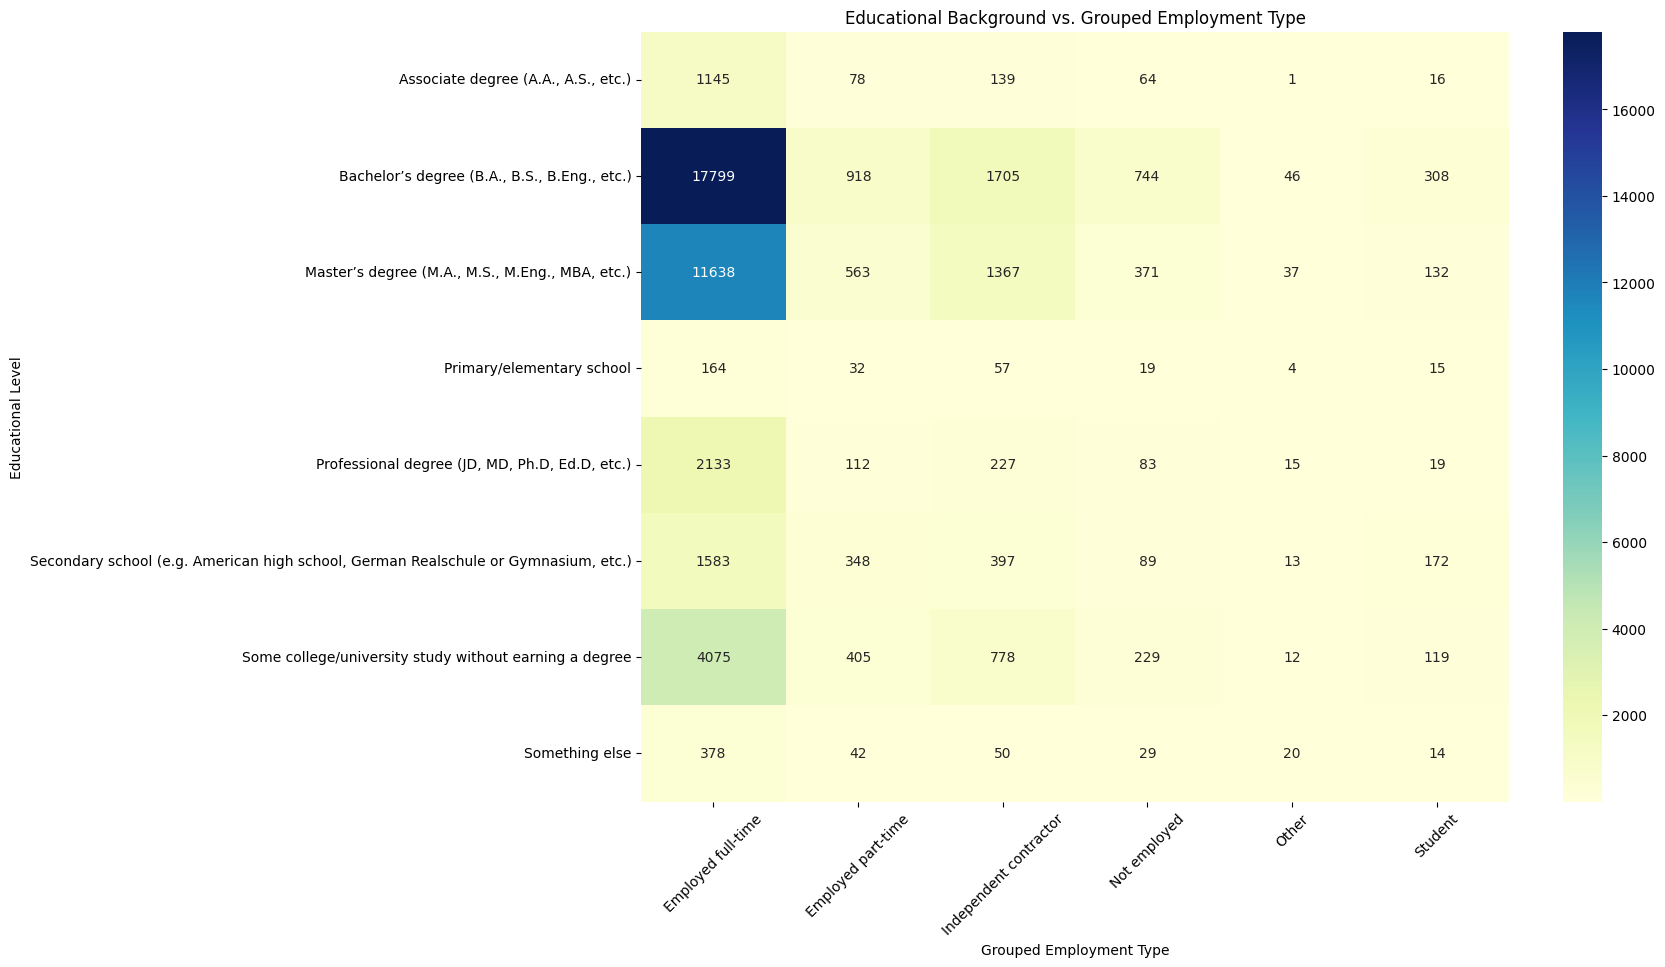

In [67]:
# Visualize with a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(edlevel_grouped_employment_crosstab, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Educational Background vs. Grouped Employment Type')
plt.xlabel('Grouped Employment Type')
plt.ylabel('Educational Level')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
df.to_csv("cleaned_survey_data.csv", index=False)
print("Cleaned and analyzed dataset

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
